In [1]:
import numpy as np
import sympy as sy
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import elliptic_k, I
from sympy.abc import m

In [2]:
x,k=sy.symbols("x,k")

In [3]:
def trapezoidal_f1(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=1/(a**2) *h/2
    fbh=1/(b**2) *h/2
    
    Sum = 0
    for n in range(1,N):
        Sum = 1/(a + n*h)**2 + Sum
        
    return fah + fbh + Sum * h

def trapezoidal_f2(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah = np.exp(a) *h/2
    fbh = np.exp(b) *h/2
    
    Sum = 0
    for n in range(1,N):
        Sum = np.exp(a + n*h) + Sum
   
    return fah + fbh + Sum * h

def trapezoidal_f3(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=np.sqrt(1-a**2) *h/2
    fbh=np.sqrt(1-b**2) *h/2
    
    Sum = 0
    for n in range(1,N):
        Sum = np.sqrt(1-(a + n*h)**2) + Sum
        
    return fah + fbh + Sum * h

def Simpson_f1(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=1/(a**2) 
    fbh=1/(b**2) 
    
    Sum = 0
    for n in range(1,N):
        if n%2==0:
            
            Sum = (1/(a + n*h)**2)*2 + Sum
            
        else: Sum = (1/(a + n*h)**2 )*4 + Sum
        
    return (fah + fbh + Sum)*h/3

def Simpson_f2(a,b,N):
    
    N=int(np.round(N))
    
    h = (b-a)/(N)
    fah = np.exp(a)
    fbh = np.exp(b) 
    
    Sum = 0
    for n in range(1,N):
        
        if n%2==0:
            
            Sum = np.exp(a + n*h)*2 + Sum
        
        else: Sum = np.exp(a + n*h)*4 + Sum
            
           
        
    return (fah + fbh + Sum)*h/3

def Simpson_f3(a,b,N):
    
    N=int(np.round(N))
    
    h = (b-a)/(N)
    fah=np.sqrt(1-a**2) 
    fbh=np.sqrt(1-b**2) 
    
    Sum = 0
    for n in range(1,N):
        
        if n%2==0:
            Sum = np.sqrt(1-(a + n*h)**2)*2 + Sum
            
        else:  Sum = np.sqrt(1-(a + n*h)**2)*4 + Sum
        
    return (fah + fbh + Sum)*h/3

# $ \int_{{\,1}}^{{\,2}}{{\frac{1}{x^2}\,dx}}$

In [4]:
f1=1/x**2 ;f1

x**(-2)

In [5]:
sy.integrate(f1,(x,1,2))

1/2

Text(0, 0.5, 'Trapezoidal algorithm')

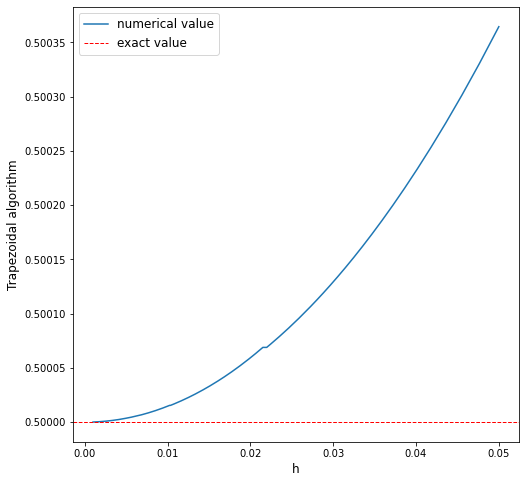

In [6]:
a=1
b=2
N=np.linspace(20,1000,1000)
y=[]
for i in range (0,len(N)):
    y.append(trapezoidal_f1(1,2,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=1/2,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Trapezoidal algorithm',fontsize=12)

Text(0, 0.5, 'Simpson’s algorithm')

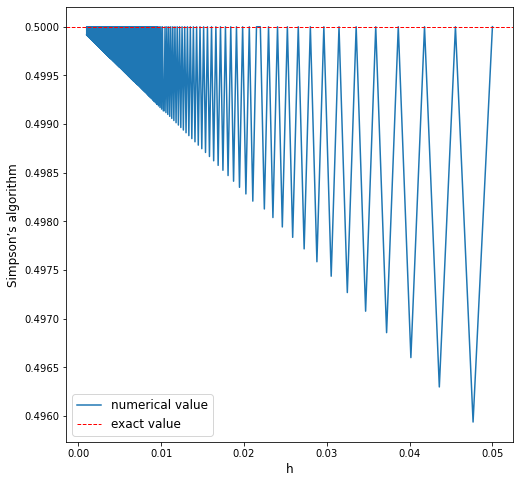

In [7]:
a=1
b=2
N=np.linspace(20,1001,1001)
y=[]
for i in range (0,len(N)):
    y.append(Simpson_f1(1,2,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=1/2,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Simpson’s algorithm',fontsize=12)

Simpson’s algorithm is designed to work with even N

In [8]:
Simpson_f1(1,2,565) ## for N = 565

0.4998523768515539

In [9]:
Simpson_f1(1,2,566) ## for N = 566

0.5000000000012592

In [10]:
Simpson_f1(1,2,129)  ## for N = 129

0.49935150181596777

In [11]:
Simpson_f1(1,2,130)  ## for N = 130

0.5000000004521504

In [12]:
Simpson_f1(1,2,131) ## for N = 131

0.49936144017241363

In [13]:
Simpson_f1(1,2,132) ## for N = 132

0.5000000004253665

For even N Simpson’s algorithm is more accurate than trapezoidal algorithm because of its parabolic nature wich gives smaller error

In [14]:
Simpson_f1(1,2,100) ## for N = 100

0.5000000012911945

In [15]:
trapezoidal_f1(1,2,100) ## for N = 100

0.5000145830104404

# $ \int_{{\,0}}^{{\,1}}{{e^x\,dx}}$

In [16]:
f2=sy.exp(x);f2

exp(x)

In [17]:
sy.integrate(f2,(x,0,1))

-1 + E

In [18]:
-1+np.exp(1)

1.718281828459045

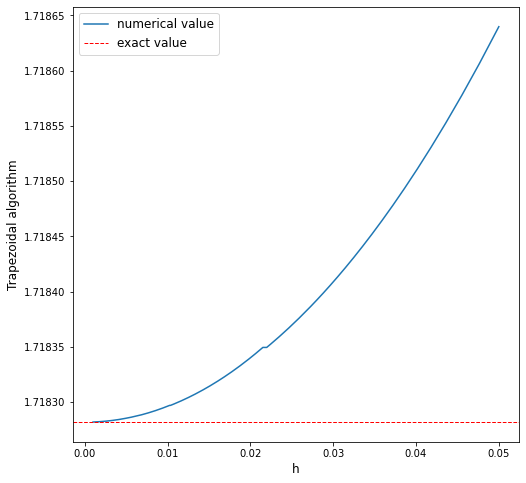

In [19]:
a=0
b=1
N=np.linspace(20,1000,1000)
y=[]
for i in range (0,len(N)):
    y.append(trapezoidal_f2(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=-1+np.exp(1),linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Trapezoidal algorithm',fontsize=12)
plt.ticklabel_format(useOffset=False) #turns off forced power graph

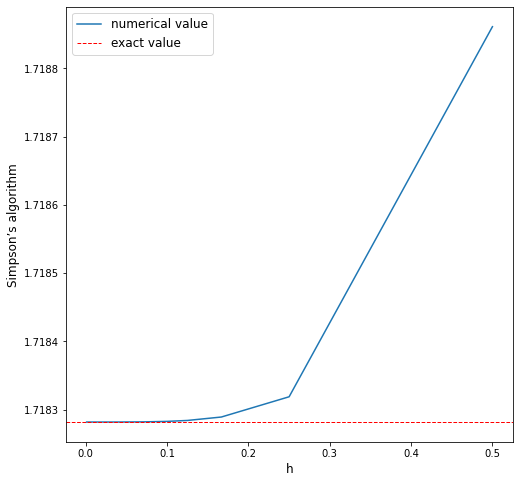

In [20]:
a=0
b=1
N=np.linspace(2,1000,500) #ONLY EVEN NUMBERS
y=[]
for i in range (0,len(N)):
    y.append(Simpson_f2(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=-1+np.exp(1),linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Simpson’s algorithm',fontsize=12)
plt.ticklabel_format(useOffset=False) #turns off forced power graph

In [21]:
-1+np.exp(1)

1.718281828459045

In [22]:
Simpson_f2(a,b,101)  ## for N = 101

1.7093550130469712

In [23]:
Simpson_f2(a,b,100)  ## for N = 100

1.7182818285545036

In [24]:
trapezoidal_f2(a,b,100)  ## for N = 100

1.7182961474504173

# $ \int_{{\,0}}^{{\,1}}{{\sqrt[]{1-x^2}\,dx}}$

In [25]:
f3=sy.sqrt(1-x**2);f3

sqrt(1 - x**2)

In [26]:
sy.integrate(f3,(x,0,1))

pi/4

In [27]:
np.pi/4

0.7853981633974483

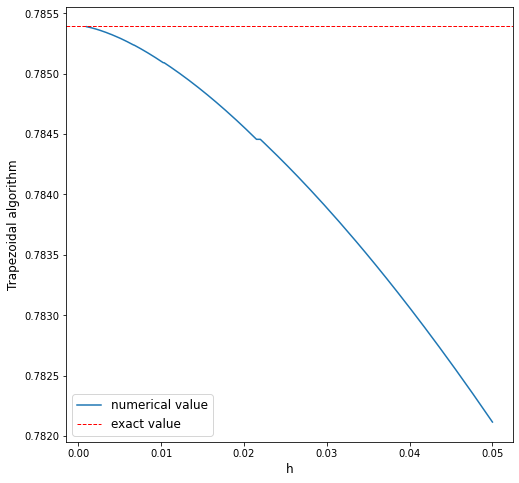

In [28]:
a=0
b=1
N=np.linspace(20,1000,1000)
y=[]
for i in range (0,len(N)):
    y.append(trapezoidal_f3(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=np.pi/4,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Trapezoidal algorithm',fontsize=12)
plt.ticklabel_format(useOffset=False) #turns off forced power graph

Text(0, 0.5, 'Simpson’s algorithm')

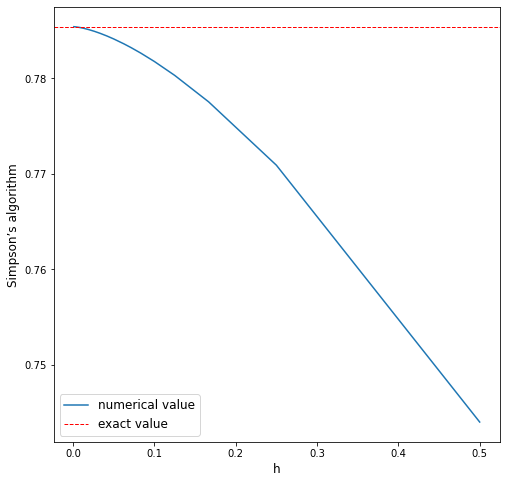

In [29]:
a=0
b=1
N=np.linspace(2,1000,500) #ONLY EVEN NUMBERS
y=[]
for i in range (0,len(N)):
    y.append(Simpson_f3(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=np.pi/4,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Simpson’s algorithm',fontsize=12)

In [30]:
np.pi/4

0.7853981633974483

In [31]:
Simpson_f3(a,b,101)

0.7849322188925619

In [32]:
Simpson_f3(a,b,100)

0.7852833013348066

In [33]:
trapezoidal_f3(a,b,100)

0.7851042579447612

In [34]:
def trapezoidal_f4(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=np.sin(a) *h/2
    fbh=np.sin(b) *h/2
    
    Sum = 0
    for n in range(1,N):
        Sum = np.sin(a+n*h) + Sum
        
    return fah + fbh + Sum * h

def trapezoidal_f5(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=1/(np.sqrt(1-0.25*(np.sin(a))**2)) *h/2
    fbh=1/(np.sqrt(1-0.25*(np.sin(b))**2)) *h/2
    
    Sum = 0
    for n in range(1,N):
        Sum = 1/(np.sqrt(1-0.25*(np.sin(a+n*h))**2)) + Sum
        
    return fah + fbh + Sum * h

def Simpson_f4(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=np.sin(a)
    fbh=np.sin(b)
    
    Sum = 0
    for n in range(1,N):
        if n%2==0:
            
            Sum = (np.sin(a+n*h))*2 + Sum
            
        else: Sum = (np.sin(a+n*h))*4 + Sum
        
    return (fah + fbh + Sum)*h/3

def Simpson_f5(a,b,N):
    
    N=int(np.round(N))
    h = (b-a)/(N)
    fah=1/(np.sqrt(1-0.25*(np.sin(a))**2)) 
    fbh=1/(np.sqrt(1-0.25*(np.sin(b))**2))
    
    Sum = 0
    for n in range(1,N):
        if n%2==0:
            
            Sum = (1/(np.sqrt(1-0.25*(np.sin(a+n*h))**2)))*2 + Sum
            
        else: Sum = (1/(np.sqrt(1-0.25*(np.sin(a+n*h))**2)))*4 + Sum
        
    return (fah + fbh + Sum)*h/3


# $ \int_{{\,0}}^{{\,2\pi}}{{sin(x)\,dx}}$

In [35]:
f4=sy.sin(x);f4

sin(x)

In [36]:
sy.integrate(f4,(x,0,2*sy.pi))

0

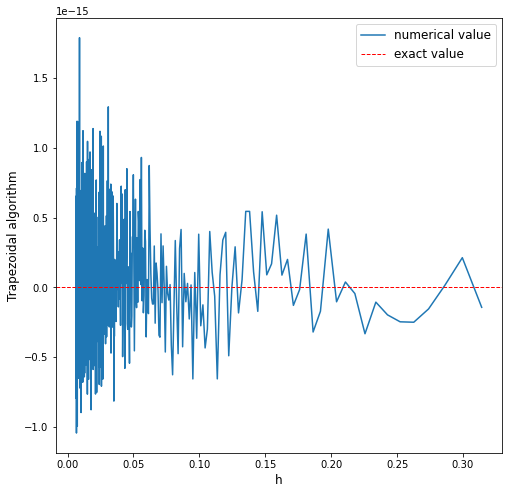

In [37]:
a=0
b=2*np.pi
N=np.linspace(20,1000,1000)
y=[]
for i in range (0,len(N)):
    y.append(trapezoidal_f4(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=0,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Trapezoidal algorithm',fontsize=12)
plt.ticklabel_format(useOffset=False) #turns off forced power graph

Text(0, 0.5, 'Simpson’s algorithm')

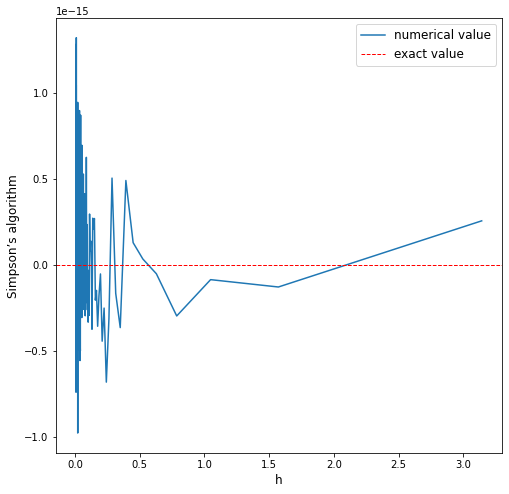

In [38]:
a=0
b=2*np.pi
N=np.linspace(2,1000,500) #ONLY EVEN NUMBERS
y=[]
for i in range (0,len(N)):
    y.append(Simpson_f4(a,b,N[i]))     
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=0,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Simpson’s algorithm',fontsize=12)

In [39]:
trapezoidal_f4(a,b,100)

4.134654383596552e-16

In [40]:
Simpson_f4(a,b,100)

2.5297248033604734e-16

Floating point is reached

# $ \int_{{\,0}}^{{\,\pi/2}}{{\frac{1}{\sqrt[]{-0.25sin^2(x)+1}}\,dx}}$

In [41]:
f5=1/(sy.sqrt(1-0.25*(sy.sin(x))**2));f5

1/sqrt(1 - 0.25*sin(x)**2)

In [42]:
sy.integrate(f5,(x,0,sy.pi/2))

1.68575035481260

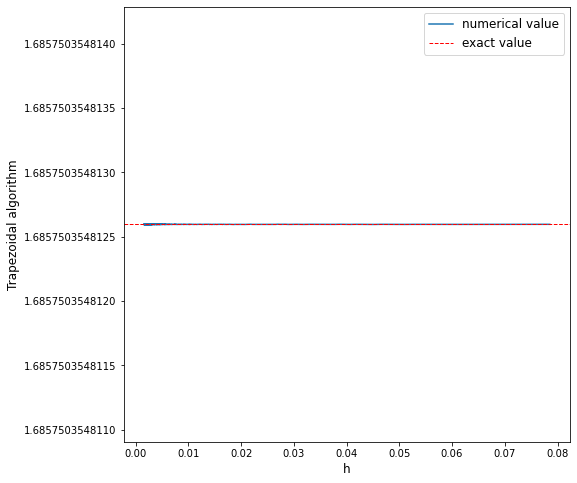

In [43]:
a=0
b=np.pi/2
N=np.linspace(20,1000,1000)
y=[]
for i in range (0,len(N)):
    y.append(trapezoidal_f5(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=1.6857503548126,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Trapezoidal algorithm',fontsize=12)
plt.ticklabel_format(useOffset=False) #turns off forced power graph

Text(0, 0.5, 'Simpson’s algorithm')

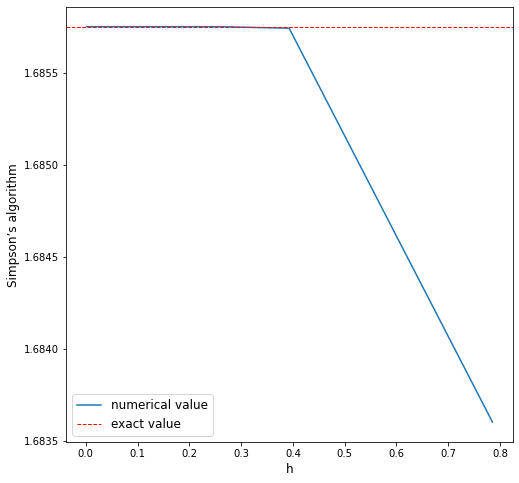

In [44]:
a=0
b=np.pi/2
N=np.linspace(2,1000,500) #ONLY EVEN NUMBERS
y=[]
for i in range (0,len(N)):
    y.append(Simpson_f5(a,b,N[i]))    
    
plt.rcParams['figure.figsize'] = [8,8]

plt.plot((b-a)/(N),y,label='numerical value')
plt.axhline(y=1.6857503548126,linewidth=1,ls='--',color='red',label='exact value')

plt.legend(fontsize=12)
plt.xlabel("h",fontsize=12)
plt.ylabel('Simpson’s algorithm',fontsize=12)

In [45]:
1.6857503548126

1.6857503548126

In [46]:
trapezoidal_f5(a,b,10) #N=10

1.6857503548125958

In [47]:
trapezoidal_f5(0,np.pi/2,100) #N=100

1.6857503548125963

In [48]:
Simpson_f5(a,b,10) #N=10

1.6857503548118746

In [49]:
Simpson_f5(a,b,100) #N=100

1.6857503548125956

In [50]:
Simpson_f5(a,b,5) #N=5

1.56483092539467

In [51]:
trapezoidal_f5(0,np.pi/2,5) #N=5

1.6857503548147608

Algorithms can clearly work excellent for some integrals